
# Project: Investigate a Dataset (TMDb movie data)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

-This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. 
- Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|)characters. 
- There are some odd characters in the ‘cast’ column. 
- The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.




In [1]:
#Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling



### General Properties

In [2]:
df = pd.read_csv('tmdb-movies.csv') #Reading CSV File
df.head(30)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,281957,tt1663202,9.110700,135000000,532950503,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,http://www.foxmovies.com/movies/the-revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,"(n. One who has returned, as if from the dead.)",...,"In the 1820s, a frontiersman, Hugh Glass, sets...",156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,87101,tt1340138,8.654359,155000000,440603537,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,http://www.terminatormovie.com/,Alan Taylor,Reset the future,...,"The year is 2029. John Connor, leader of the r...",125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,286217,tt3659388,7.667400,108000000,595380321,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,http://www.foxmovies.com/movies/the-martian,Ridley Scott,Bring Him Home,...,"During a manned mission to Mars, Astronaut Mar...",141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,211672,tt2293640,7.404165,74000000,1156730962,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,http://www.minionsmovie.com/,Kyle Balda|Pierre Coffin,"Before Gru, they had a history of bad bosses",...,"Minions Stuart, Kevin and Bob are recruited by...",91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,150540,tt2096673,6.326804,175000000,853708609,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,http://movies.disney.com/inside-out,Pete Docter,Meet the little voices inside your head.,...,"Growing up can be a bumpy road, and it's no ex...",94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15

In [3]:
df.shape

(10866, 21)

In [4]:
df.describe() #Statistics of Dataset

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

> ### Data Cleaning 

In [6]:
#Dropping Unnecessary Columns
df.drop(['id','imdb_id','homepage','tagline', 'overview','keywords'], axis =1, inplace = True) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000243862A1BE0>,
      dtype=object)

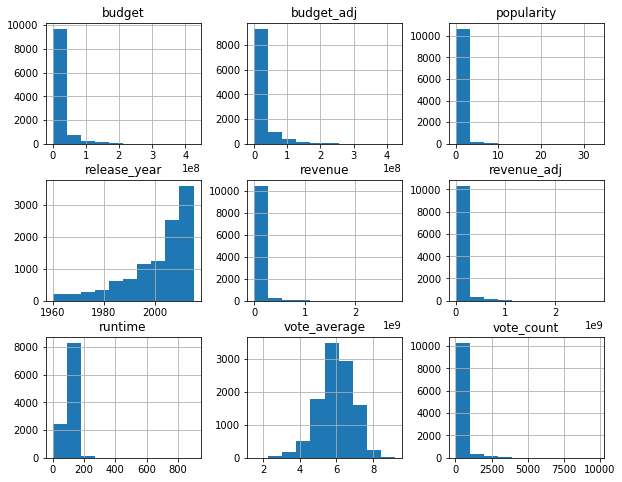

In [7]:
#Histogram of the Dataset
df.hist(figsize=[10,8])

In [8]:
#Filling Missing numeric column values with mean 
df.fillna(df.mean(),inplace= True)

In [9]:
#Drop remaining Nulls from the Dataset
df = df.dropna()

In [10]:
#Testing Cleaned Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9773 entries, 0 to 10865
Data columns (total 15 columns):
popularity              9773 non-null float64
budget                  9773 non-null int64
revenue                 9773 non-null int64
original_title          9773 non-null object
cast                    9773 non-null object
director                9773 non-null object
runtime                 9773 non-null int64
genres                  9773 non-null object
production_companies    9773 non-null object
release_date            9773 non-null object
vote_count              9773 non-null int64
vote_average            9773 non-null float64
release_year            9773 non-null int64
budget_adj              9773 non-null float64
revenue_adj             9773 non-null float64
dtypes: float64(4), int64(5), object(6)
memory usage: 1.2+ MB


In [11]:
# Craeting release_month column and deleting release_date column
df['release_date'] = pd.to_datetime(df['release_date'])
df['release_month'] = df.release_date.dt.month
df.drop(['release_date'], axis =1, inplace = True)


In [12]:
df.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,6
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,5
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08,3
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09,12
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09,4


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: ( What kinds of properties are associated with movies that have high revenues?)

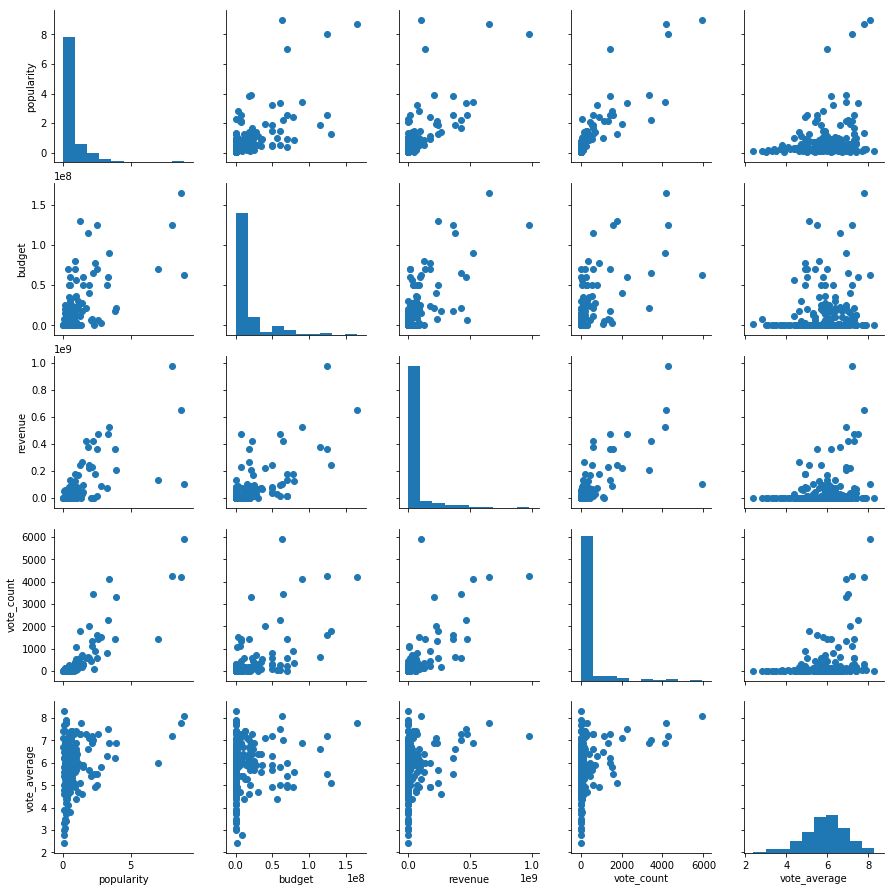

In [13]:
#Taking a sample of 200 entries and trying to find any relationship between numeric variables. My main interest is to find 
#relationship between high revenue with other numeric variables.
df_sample =df.sample(200)
g = sb.PairGrid(data = df_sample, vars = ['popularity', 'budget', 'revenue', 'vote_count', 'vote_average'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)


Facetplot shows the relationship between 'popularity', 'budget', 'revenue', 'vote_count', 'vote_average' visually. From the plot we can see that revenue is increasing little with increasing popularity, budget, vote_count but not with vote_average.


C:\Users\Md Rahamat Ullah\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


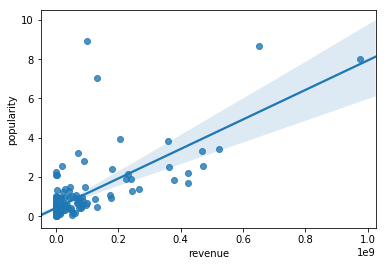

In [14]:
sb.regplot(data = df_sample, x= 'revenue', y = 'popularity')

Revenue has positive correlation with popularity.

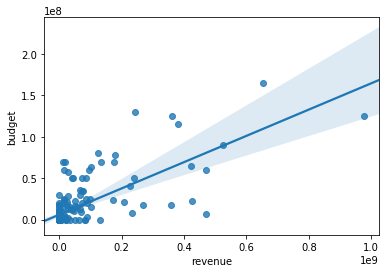

In [15]:
sb.regplot(data = df_sample, x= 'revenue', y = 'budget')

Revenue has positive correlation with budget.

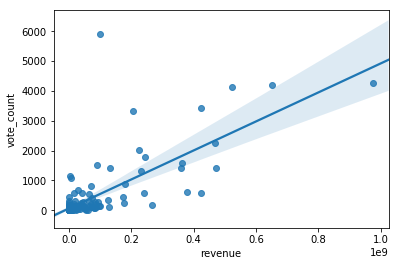

In [16]:
sb.regplot(data = df_sample, x= 'revenue', y = 'vote_count')

Revenue has positive correlation with vote_count.

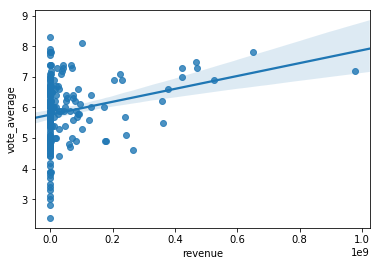

In [17]:
sb.regplot(data = df_sample, x= 'revenue', y = 'vote_average')

Revenue has fairly flat correlation with vote_average.

## Research Question 2  (Who are top 20 Actors selcted from top 500 profitable films?)

In [18]:
#Adding a column for profit in the table:
df['profit'] = df['revenue']-df['budget']


Text(0, 0.5, 'Movie Counts')

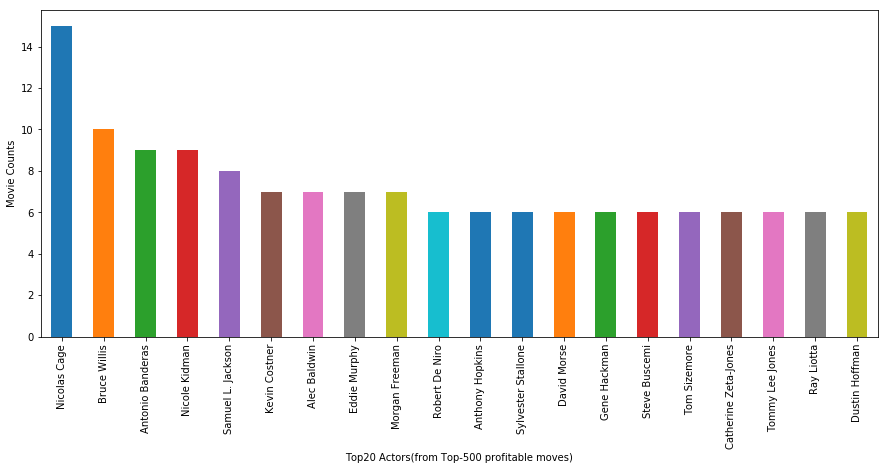

In [19]:
#Creating a function that will return a barchart of top 20 actors based on the numeric column selected from df.
def Top20cast(x):
    Top500 = df[[x,'cast']].sort_values(x).head(500)  
    Top500 = Top500.reset_index(); 
    column_values = list(Top500.cast)
    actors = []
    for col_val in column_values:
        s = str(col_val)
        actors.extend(s.split('|'))
    a = pd.Series(actors)
    a.value_counts().head(20).plot(kind = 'bar',figsize=(15,6))

#calling above function
Top20cast('profit')
plt.xlabel('Top20 Actors(from Top-500 profitable moves)')
plt.ylabel('Movie Counts')

- The top 20 actors who acted in top 500 profitable movies. From the list of top 500 profitable movies Nichloas Case acted in 15 movies, followed by Bruce Willis who acted in 10 movies. Antonio Benderes and Nicole Kidman both acted in 9 movies and in third place combinedly.   

## Research Question 3 (Who are top 20 Actors acted in top 500 popular films?)

Text(0, 0.5, 'Movie Counts')

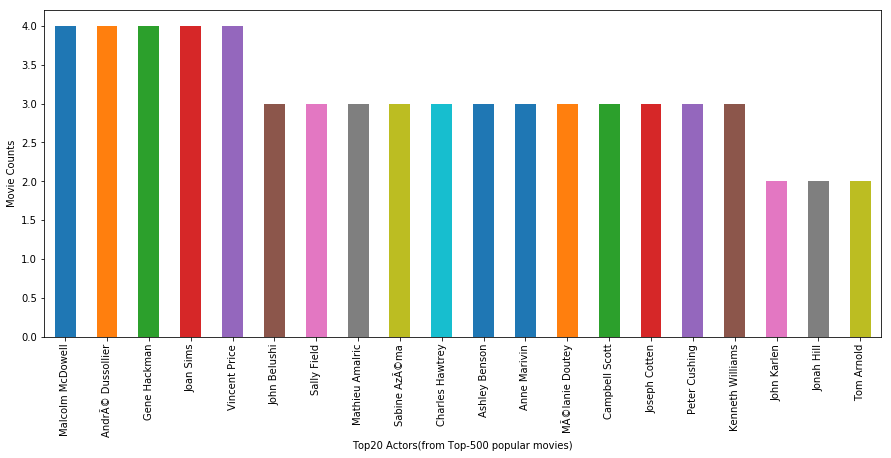

In [20]:
Top20cast('popularity')
plt.xlabel('Top20 Actors(from Top-500 popular movies)')
plt.ylabel('Movie Counts')

The above bar plot shows the top 20 actors who acted in top 500 popular movies. From the list of top 500 popular movies Malcomn McDowell, Gene Hackman, Vincent Prince & Joan Sims all acted in 4 movies.

## Research Question 4 ( Who are top 20 Actors acted in top 500 films(base on vote count)?)

Text(0, 0.5, 'Movie Counts')

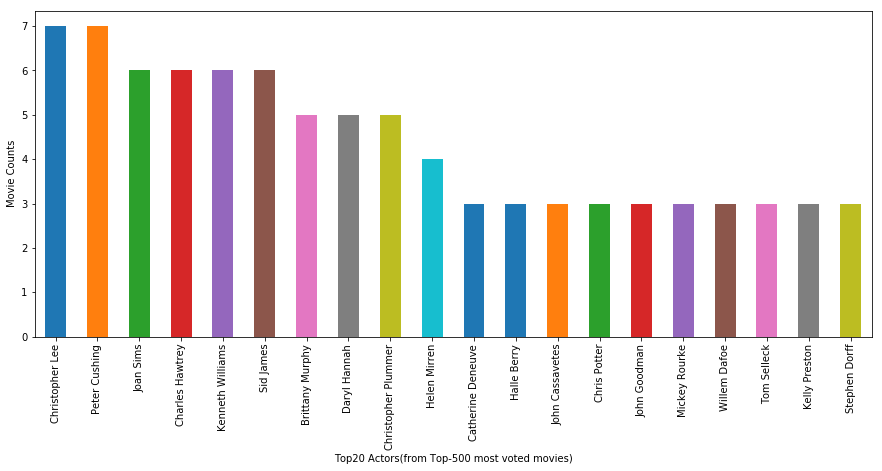

In [21]:
Top20cast('vote_count')
plt.xlabel('Top20 Actors(from Top-500 most voted movies)')
plt.ylabel('Movie Counts')

The above bar plot shows the top 20 actors who acted in top 500 most voted movies. From the list of top 500 most voted movies Christopher Lee, Peter Cushing and Charles Hawtrey are in top 3 actors who acted in most of ilms in the list.

## Research Question 5 (What are the top 3 genres based on popularity, profit and runtime?)

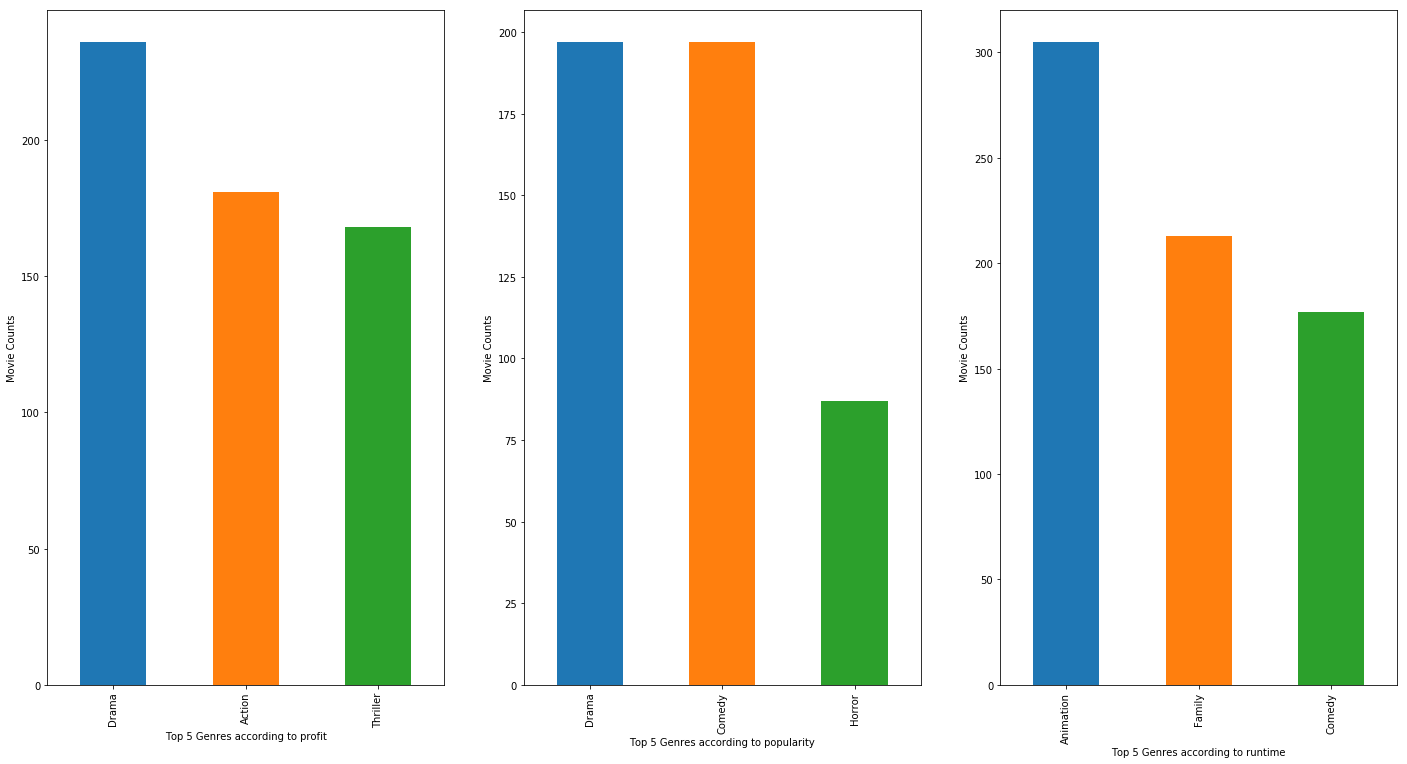

In [22]:
#Creating a function that will return a barchart of top 3 Genres based on the numeric column selected from df.
def Top3Genres(x):
    Top3Genres = df[[x,'genres']].sort_values(x).head(500)    
    Top3Genres = Top3Genres.reset_index(); 
    column_values = list(Top3Genres.genres)
    genres = []
    for col_val in column_values:
        s = str(col_val)
        genres.extend(s.split('|'))
    a = pd.Series(genres)
    a.value_counts().head(3).plot(kind = 'bar')
    plt.ylabel('Movie Counts')


#calling above function
plt.figure(figsize = [10,5])

plt.subplot(1,3,1)
Top3Genres('profit')
plt.xlabel('Top 5 Genres according to profit')

plt.subplot(1,3,2)
Top3Genres('popularity')
plt.xlabel('Top 5 Genres according to popularity')

plt.subplot(1,3,3)
Top3Genres('runtime')
plt.xlabel('Top 5 Genres according to runtime')

plt.subplots_adjust( right=2, top=2)

Top 3 Generes Based on:
 - Profit: Darama, Action, Thriller
 - Profit: Comedy, Darama, Horror
 - Runtime: Animation, Family, Comedy

<a id='conclusions'></a>
## Conclusions

This was a very interesting data analysis. We came out with some very interesting facts about movies. After this analysis we can conclude following:

- Data Cleaning:
 - 'id','imdb_id','homepage','tagline', 'overview','keywords' columns were dropped.
 - Filling Missing numeric column values was done with column mean. 
 - 'release_month' column was created and 'release_date' column was deleted
 - Finally remaining all entries with NULL was dropped from the dataset.

- Exploratory Data Analysis

**Research Question 1:** ( What kinds of properties are associated with movies that have high revenues?)
- Revenue is increasing little with increasing popularity, budget, vote_count but not with vote_average.

**Research Question 2** (Who are top 20 Actors acted in top 500 profitable films?)
- The top 20 actors who acted in top 500 profitable movies. From the list of top 500 profitable movies Nichloas Case acted in 15 movies, followed by Bruce Willis who acted in 10 movies. Antonio Benderes and Nicole Kidman both acted in 9 movies and in third place combinedly. 

**Research Question 3** (Who are top 20 Actors acted in top 500 popular films?)
- From the list of top 500 popular movies Malcomn McDowell, Gene Hackman, Vincent Prince & Joan Sims all acted in 4 movies.

**Research Question 3** (Who are top 20 Actors acted in top 500 most voted films?)
- From the list of top 500 most voted movies Christopher Lee, Peter Cushing and Charles Hawtrey are in top 3 actors who acted in most of ilms in the list.

**Research Question 3** (Who are top 3 Genres based on popularity(top 500), profit(top 500) and runtime(top 500)?])
Top 3 Generes Based on:
 - Profit: Darama, Action, Thriller
 - Profit: Comedy, Darama, Horror
 - Runtime: Animation, Family, Comedy


**Limitations**: Revenue was taken from actual revenue, not adjusted revenue.

In [23]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0